<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Simulaci%C3%B3nI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generador aleatorio

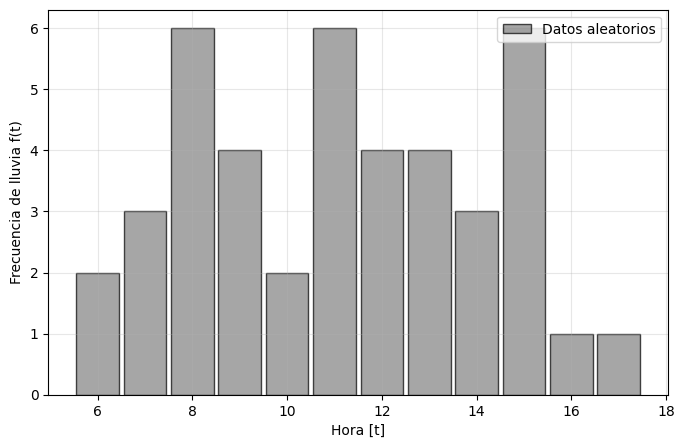

In [72]:
# Simulación de lluvia en Bogotá

import numpy as np
import matplotlib.pyplot as plt
import random as rn


intervalos = np.arange(6, 18)          # Horas: [6,7), [7,8), ..., [17,18)
fmax = 1/6                             # defino el fmax que viene del área del triángulo de la probabilidad y de que eso debe ser = 1


p = []
for n in intervalos:                   # en este pedazo estoy definiendo la probabilidad que me da el enunciado, uso las medias horas para meterme en el intervalo
    mid = n + 0.5                      # la hora y media
    if mid <= 14:                      # según el enunciado, la probabilidad de lluvia crece hasta las 2 y empieza a disminuir hasta las 6 otra vez
        val = (fmax/8)*(mid-6)
    else:
        val = (fmax/4)*(18-mid)
    p.append(val)                      # en esta lista me quedan 12 probabilidades correspondientes a los 12 intervalos

p = np.array(p)                        # convierto la lista a array
p /= p.sum()                           # normalizo a 1


pdf = np.insert(p, 0, 0)               # tengo las probabilidades, comienzo en 0 entonces pdf[1] corresponde al primer intervalo, por ejemplo
dim_pdf = len(pdf)

F = np.zeros(dim_pdf)                  # construyo la función acumulada (va sumando la probabilidad)

for i in np.arange(1, dim_pdf):        # esta me sirve para volver un número aleatorio en un intervalo horario (los saltos de probabilidad corresponden a los intervalos)
    F[i] = F[i-1] + pdf[i]


N = 30                                # número de días de "observación", para mayor cantidad de días, debe ajustarse más el histograma a la probabilidad, para menos días no se ve clara la tendencia
histograma = np.array([0]*dim_pdf)

rn.seed(123)

for i in range(N):
    r = rn.random()                    # cada día genero un número aleatorio
    for j in np.arange(1, dim_pdf):    # veo en qué intervalo cae ese número (recorriendo la función acumulada)
        if r >= F[j-1] and r < F[j]:
            bingo = j                  # cuando encuentro el intervalo ...
            break
    histograma[bingo] += 1             # le sumo al histograma 1 en esa posición (así va creciendo)

histograma = histograma + 1            # me aseguro que siempre hay al menos un tris de lluvia

plt.figure(figsize=(8,5))
plt.bar(intervalos, histograma[1:], width=0.9, alpha=0.7,
        edgecolor='black', color="grey", label='Datos aleatorios')

# Distribución teórica (escalada a N días)
#plt.plot(intervalos, N*p, 'ro-', linewidth=2, label='Distribución teórica')

plt.xlabel("Hora [t]")
plt.ylabel("Frecuencia de lluvia f(t)")
#plt.title(f"Simulación de lluvia en {N} días")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Primer punto (y tercero)
Cositas explicadas en la tablet



=== Tabla comparativa numérica ===
   Intervalo  Simulación (a)  Simulación (b)  Diferencia (b-a)
0      [6,7)             0.1             0.1               0.0
1      [7,8)             0.2             0.2               0.0
2      [8,9)             0.3             0.3               0.0
3     [9,10)             0.3             0.3               0.0
4    [10,11)             0.1             0.1               0.0
5    [11,12)             0.2             0.2               0.0
6    [12,13)             0.2             0.2               0.0
7    [13,14)             0.2             0.2               0.0
8    [14,15)             0.1             0.1               0.0
9    [15,16)             0.3             0.3               0.0
10   [16,17)             0.1             0.1               0.0
11   [17,18)             0.1             0.1               0.0

Suma método (a): 1.0
Suma método (b): 1.0


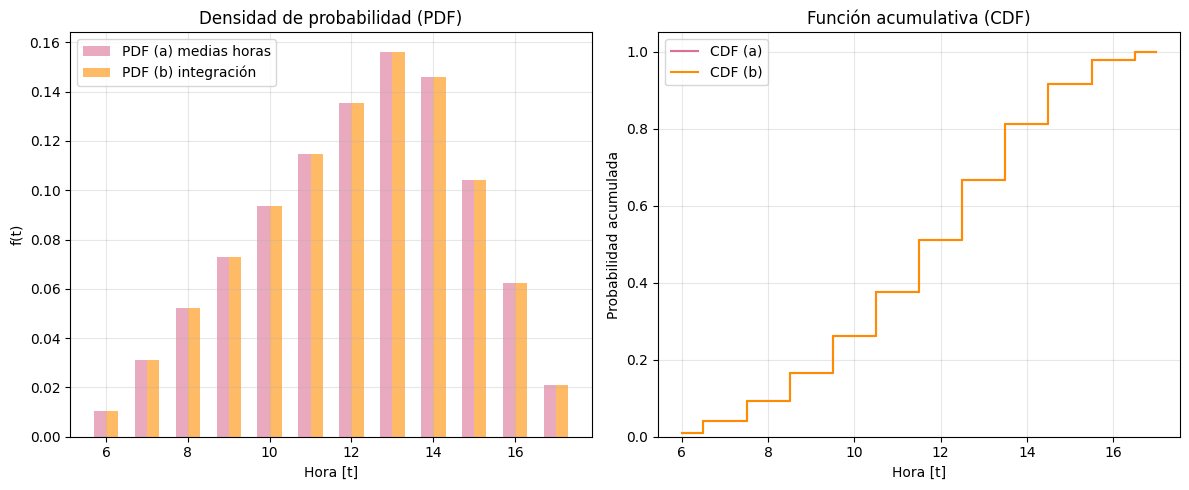

In [143]:
# Simulación de lluvia en Bogotá – Punto 1

import numpy as np
import matplotlib.pyplot as plt
import random as rn


intervalos = np.arange(6, 18)
fmax = 1/6

def f(t):
  if 6 <= t <= 14:
    return (fmax/8)*(t-6)
  elif 14 < t <= 18:
    return (fmax/4)*(18-t)
  else:
    return 0

# (a) Medias horas
p_mid = []
for n in intervalos:
    mid = n + 0.5                   # la hora y media
    p_mid.append(f(mid))            # meto a la lista la densidad de probabilidad evaluada en las medias horas
p_mid = np.array(p_mid)             # de lista a array
p_mid /= p_mid.sum()                # normalizo

pdf_mid = np.insert(p_mid, 0, 0)

# (b) Integral
p_int = []
for n in intervalos:
    t1, t2 = n, n+1
    val = (f(t1) + f(t2))/2 * (t2 - t1)   # método del trapecio (como tenemos histogramas creo que esto da como exacto)
    p_int.append(val)
p_int = np.array(p_int)
p_int /= p_int.sum()

pdf_int = np.insert(p_int, 0, 0)


def acumulada(pdf):                   # Función acumulada para hacer la simulación con aleatorios (como antes)
    F = np.zeros(len(pdf))
    for i in range(1, len(pdf)):
        F[i] = F[i-1] + pdf[i]
    return F

F_mid = acumulada(pdf_mid)
F_int = acumulada(pdf_int)


def aleato(lista, F):
    histograma = np.array([0]*len(F))
    for r in lista:
        for j in np.arange(1, len(F)):
            if r >= F[j-1] and r < F[j]:
                histograma[j] += 1
                break
    return histograma[1:]                 # empiezo no desde el índice ficticio sino desde el primer intervalo

N = 10
rn.seed(123)
lista = [rn.random() for _ in range(N)] # para darle la misma secuencia de aleatorios a ambos métodos

hist_mid = aleato(lista, F_mid) + 1           # sumo 1 para asegurarme que siempre va a haber lluvia
hist_int = aleato(lista, F_int) + 1

tabla = pd.DataFrame({                                      # esta tablita para ver la diferencia entre los métodos de forma numérica
    "Intervalo": [f"[{n},{n+1})" for n in intervalos],
    "Simulación (a)": hist_mid/N,
    "Simulación (b)": hist_int/N,
    "Diferencia (b-a)": np.abs(hist_mid - hist_int)/N,
})

print("\n=== Tabla comparativa numérica ===")
print(tabla)
print("\nSuma método (a):", p_mid.sum())          # para ver que los métodos sí mantienen la densidad de probabilidad normalizada
print("Suma método (b):", p_int.sum())


plt.figure(figsize=(12,5))
"""
plt.plot(intervalos, p_mid, 'ro-', label="PDF teórica (a)")
plt.plot(intervalos, p_int, 'bs--', label="PDF teórica (b)")
"""
# Descomentar esto para punto 1
"""
plt.bar(intervalos-0.15, hist_mid/N, width=0.3,color='palevioletred', alpha=0.6, label="Medias horas")
plt.bar(intervalos+0.15, hist_int/N, width=0.3,color='darkorange', alpha=0.6, label="Integración")
"""
"""
plt.xlabel("Hora [t]")
plt.ylabel("f(t)")
#plt.title(f"Simulación de lluvia en {N} días: comparación métodos (a) y (b)")
plt.legend()
plt.grid(alpha=0.3)
"""

# Aquí las cositas del punto 3, se comenta con """ para quitar el plot

# Densidad de probabilidad (¿sí será esto lo que toca?)
plt.subplot(1,2,1)
plt.bar(intervalos-0.15, p_mid, width=0.3, color='palevioletred',
        alpha=0.6, label="PDF (a) medias horas")
plt.bar(intervalos+0.15, p_int, width=0.3, color='darkorange',
        alpha=0.6, label="PDF (b) integración")
plt.xlabel("Hora [t]")
plt.ylabel("f(t)")
plt.title("Densidad de probabilidad (PDF)")
plt.legend()
plt.grid(alpha=0.3)

# Función acumulativa
plt.subplot(1,2,2)
plt.step(intervalos, F_mid[1:], where="mid", color="palevioletred", label="CDF (a)")    # no se ve porque son iguales, toca acomodarla punteada o algo para que se vea
plt.step(intervalos, F_int[1:], where="mid", color="darkorange", label="CDF (b)")
plt.xlabel("Hora [t]")
plt.ylabel("Probabilidad acumulada")
plt.title("Función acumulativa (CDF)")
plt.ylim(0,1.05)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



# Segundo punto
explicado en la tablet

# Cuarto punto (y quinto)
histogramas para distinto número de días

/tmp/ipython-input-1342569732.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  axs[i].plot(intervalos, N*p, 'ro-',color='darkorange', linewidth=2, label='Distribución original')


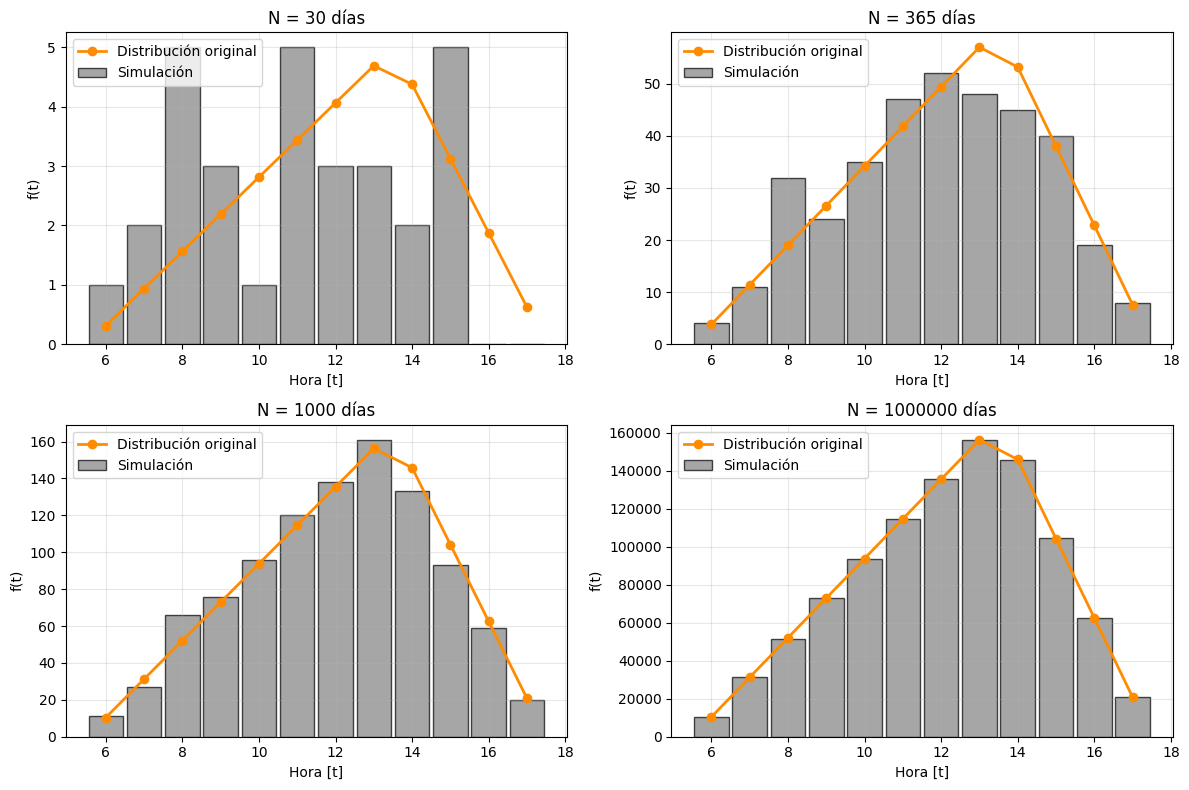

In [147]:
# Simulación de lluvia en Bogotá - cuarto punto

import numpy as np
import matplotlib.pyplot as plt
import random as rn


intervalos = np.arange(6, 18)
fmax = 1/6

p = []
for n in intervalos:
    mid = n + 0.5
    if mid <= 14:
        val = (fmax/8)*(mid-6)
    else:
        val = (fmax/4)*(18-mid)
    p.append(val)

p = np.array(p)
# esta la quito para ver lo de la normalización en el punto 5
#p /= p.sum()


pdf = np.insert(p, 0, 0)



dim_pdf = len(pdf)
F = np.zeros(dim_pdf)

for i in np.arange(1, dim_pdf):
    F[i] = F[i-1] + pdf[i]



def lluviasim(N, seed=123):
    histograma = np.array([0]*dim_pdf)
    rn.seed(seed)
    for i in range(N):
        r = rn.random()
        for j in np.arange(1, dim_pdf):
            if r >= F[j-1] and r < F[j]:
                bingo = j
                break
        histograma[bingo] += 1
    return histograma[1:]


N_vals = [30, 365, 1000, 10**6]               # número de días que pide el ejercicio
resultados = [lluviasim(N) for N in N_vals]


fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()

for i, N in enumerate(N_vals):
    axs[i].bar(intervalos, resultados[i], width=0.9, alpha=0.7,
               edgecolor='black',color='grey', label='Simulación')
    axs[i].plot(intervalos, N*p, 'ro-',color='darkorange', linewidth=2, label='Distribución original')
    axs[i].set_title(f"N = {N} días")
    axs[i].set_xlabel("Hora [t]")
    axs[i].set_ylabel("f(t)")
    axs[i].legend()
    axs[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# **OTRAS COSAS FUERA DE LA SIMULACIÓN**

1 0.0 0.16666666666666666
2 0.0 0.25
3 0.0 0.16666666666666666
4 0.0 0.16666666666666666
5 0.0 0.08333333333333333
6 0.0 0.16666666666666666
7 0.0 0.16666666666666666
8 0.0 0.16666666666666666
9 0.0 0.16666666666666666
10 0.0 0.16666666666666666


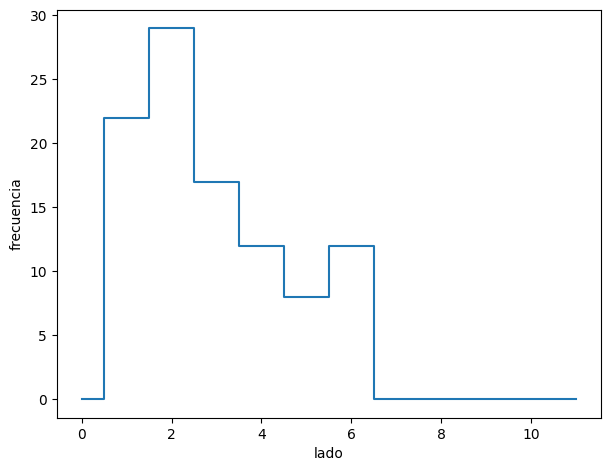

In [ ]:
# ESTE ES EL CÓDIGO BASE DE CRISTANCHO
# Programa "semilla" para aprender a simular
# Ojo: no hay ningún intento por lograr
#      1) Ni optimización en tiempo
#      2) Ni optimización en representación gráfica
# autor: Fernando Cristancho lfcristanchom@unal.edu.co

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn

# dado piramidal
histograma = np.array([0]*12)
# dado piramidal:
pdf = np.array([0,1/6,1/4,1/6,1/6,1/12,1/6,1/6,1/6,1/6,1/6])
# siguientes dos líneas: dado cúbico
#pdf = np.array([0,1/6,1/6,1/6,1/6,1/6,1/6])
dim_pdf = len(pdf)
F = np.zeros(dim_pdf)

for i in np.arange(1,dim_pdf):
    print(i,F[i],pdf[i])
    F[i] = F[i-1] + pdf[i]

# N = Número de historias = número de veces que lanza el dado
N = 100

rn.seed(123)
for i in range(N):
    r = rn.random()
    for j in np.arange(1,dim_pdf):
        if r >= F[j-1] and r < F[j]:
            bingo = j
            break
    histograma[bingo] += 1

fig = plt.figure(1)
ax = fig.add_axes([0.1,0.1,0.85,0.85])

ax.set_xlabel('lado')
ax.set_ylabel('frecuencia')

x = np.arange(0,(len(histograma)))
plt.plot(x,histograma,ds='steps-mid')
plt.show()

   interval     p_mid     p_int      diff
0     [6,7)  0.095238  0.079077  0.016161
1     [7,8)  0.166667  0.167710  0.001044
2     [8,9)  0.095238  0.105476  0.010238
3    [9,10)  0.095238  0.094816  0.000422
4   [10,11)  0.071429  0.084002  0.012573
5   [11,12)  0.142857  0.134035  0.008822
6   [12,13)  0.023810  0.035949  0.012139
7   [13,14)  0.047619  0.050214  0.002595
8   [14,15)  0.095238  0.092403  0.002835
9   [15,16)  0.047619  0.057293  0.009674
10  [16,17)  0.095238  0.094208  0.001030
11  [17,18)  0.023810  0.004817  0.018993


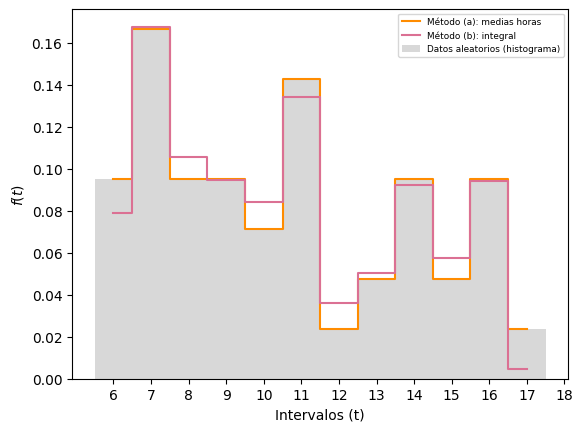

In [ ]:
# ESTO ES LO PRIMERO QUE HICE PERO CREO QUE NO ESTÁ BIEN

import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy.interpolate import interp1d
from scipy.integrate import quad
import pandas as pd

# generador aleatorio, aquí intento hacer que llueva todos los días en frecuencias distintas a diferentes horas (intervalos)
n_intervalos = 12                                                                 # 12 intervalos de 6 am a 6 pm (18:00)
N = 30                                                                            # número de días que realiza el "experimento"
rn.seed(200)                                                                      # semilla aleatoria

# Cada día llueve en un intervalo elegido al azar
datos = [rn.uniform(6, 18) for _ in range(N)]                         # randint elige el intervalo cada día en el que va a llover, el primero es el 0 del array

# Histograma de frecuencias
histograma, _ = np.histogram(datos, bins = n_intervalos, range=(6, 18))
histograma = histograma + 1                                                       # en esta primera parte del ejercicio, siempre debe haber lluvia, sumo 1 a todo en caso de que el generador no me de un bin en algún intervalo
f_est = histograma / histograma.sum()                                             # se divide para obtener frecuencias relativas. Así, tengo la primera forma discreta de f(t)

# busco encontrar la forma de la f(t) continua, para eso...
t_points = np.arange(6, 18) + 0.5                                                 # defino puntos en la mitad de cada intervalo
f_interp = interp1d(t_points, f_est, kind="cubic", fill_value="extrapolate")      # f_est da los valores en esos puntos, e interp1d saca una función suave y contínua de ahí

# para este punto, ya tengo mi generador aleatorio, y una función que define el histograma. Ahora, vamos con los métodos.

# Método (a): evaluar la frecuencia con el valor de la función a las medias horas
# ya tengo t_points, que son los valores de la mitad de intervalo (medias horas)
p_mid = f_interp(t_points)
p_mid[p_mid < 0] = 0                                                              # evito valores negativos
p_mid /= p_mid.sum()                                                              # normalización para que las probabilidades sumen 1

# Método (b): evaluar la frecuencia con el valor proporcional a la integral bajo la curva
p_int = []
for h in range(6, 18):
    val, _ = quad(lambda t: f_interp(t), h, h+1)                                  # para cada intervalo se calcula la integral de la f(t) interpolada (con quad, para integrales definidas)
    p_int.append(val)                                                             # se guardan en una lista los valores de la integral para cada intervalo
p_int = np.array(p_int)                                                           # esta es la lista convertida en array
p_int /= p_int.sum()                                                              # normalización para que sumen 1


# ya implementados ambos métodos, debo compararlos y ver si las probabilidades dan igual.

# este pedacito solo me muestra la diferencia de las probabilidades por ambos métodos (en una tablita que se imprime)
df = pd.DataFrame({
    "interval": [f"[{h},{h+1})" for h in range(6,18)],
    "p_mid": p_mid,
    "p_int": p_int,
    "diff": np.abs(p_int - p_mid)
})
print(df)                                                                         # la diferencia es poca, según se ve en la tablita


# gráficas
x = np.arange(6,18)
plt.bar(x, f_est, width=1, alpha=0.3, color='grey', label="Datos aleatorios (histograma)")
plt.step(x, p_mid, where="mid",color='darkorange', label="Método (a): medias horas")
plt.step(x, p_int, where="mid",color='palevioletred', label="Método (b): integral")
plt.xlabel("Intervalos (t)")
plt.ylabel(r"$f(t)$")
plt.xticks(np.arange(6,19,1))
plt.legend(fontsize=6.4)
plt.show()
